 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [206]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline
import seaborn as sns

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [207]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
# Reading in Whale Returns
whale_reader = pd.read_csv(whale_returns_csv, parse_dates = True, infer_datetime_format = True, index_col = 'Date')

In [208]:
whale_reader.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [209]:
# Count nulls
whale_reader.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [210]:
# Drop nulls
whale_clean = whale_reader.dropna()
whale_clean

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [211]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_returns_csv, parse_dates = True, infer_datetime_format= True, index_col = 'Date')
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [212]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [213]:
# Drop nulls
algo_clean = algo_df.dropna()
algo_clean

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [214]:
# Reading S&P 500 Closing Prices, sorting index
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_history_csv, parse_dates= True, infer_datetime_format= True, index_col ='Date')
sp500_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [215]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [216]:
# Fix Data Types
sp500_df['Close'] = sp500_df['Close'].str.replace('$', '')
sp500_df.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [217]:
#Setting Close To Float 
sp500_df['Close'] = pd.to_numeric(sp500_df['Close'], errors = 'coerce')
sp500_df.dtypes

Close    float64
dtype: object

In [218]:
#Re-Order Index
sp500_df = sp500_df.sort_index(ascending = True)
sp500_df

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [219]:
# Calculate Daily Return
sp500_df['Close'] = sp500_df['Close'].astype(float).pct_change()
sp500_df

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [220]:
# Drop nulls
sp_500_clean = sp500_df.dropna()
sp_500_clean 

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [221]:
# Rename Column
sp_500 = sp_500_clean.rename(columns = {'Close': 'S&P 500'})
sp_500.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [222]:
# Concatenate all DataFrames into a single DataFrame
rtns_group = pd.concat([whale_clean, algo_clean, sp_500],axis = 'columns', join = 'inner')
rtns_group

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

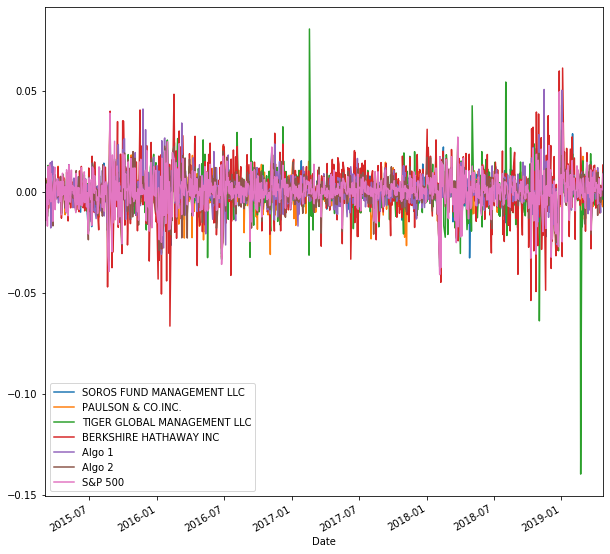

In [223]:
# Plot daily returns
rtns_group.plot(figsize = (10,10))

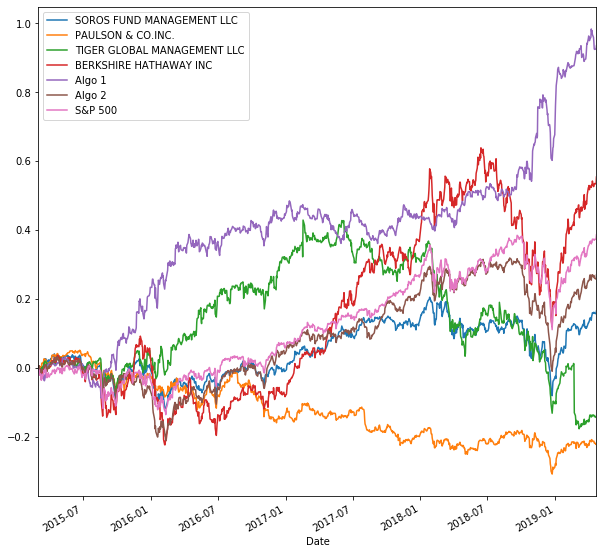

In [224]:
# Plot cumulative returns
cuml_rtns = (1+rtns_group).cumprod()-1
cuml_rtns.plot(figsize=(10,10))

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

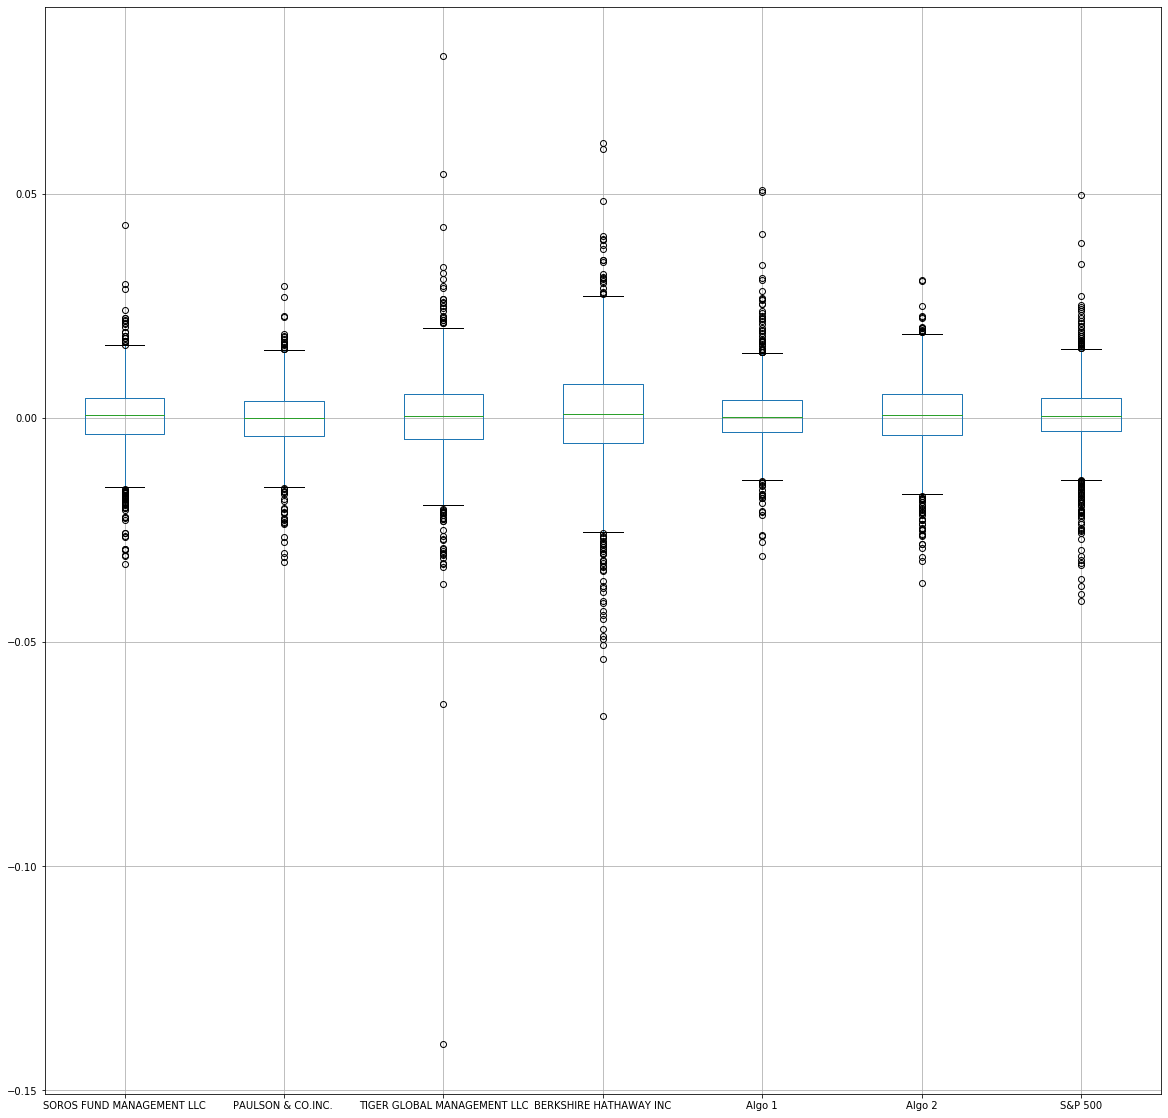

In [225]:
# Box plot to visually show risk
box_plot = rtns_group.boxplot(figsize=(20,20))
box_plot

In [226]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
std_grp = rtns_group.std()
std_grp

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

In [227]:
# Determine which portfolios are riskier than the S&P 500
std_grp = rtns_group.std()
std_grp.sort_values(inplace=True)
std_grp

PAULSON & CO.INC.              0.007023
Algo 1                         0.007620
SOROS FUND MANAGEMENT LLC      0.007895
Algo 2                         0.008342
S&P 500                        0.008554
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

In [228]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std_grp =rtns_group.std() * np.sqrt(252)
annualized_std_grp.sort_values(inplace=True)
annualized_std_grp

PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
S&P 500                        0.135786
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

In [229]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
rtns_group['S&P 500'].rolling(window=21).std()

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    0.006498
2019-04-17    0.006537
2019-04-18    0.006470
2019-04-22    0.006094
2019-04-23    0.004325
Name: S&P 500, Length: 1043, dtype: float64

In [230]:
# Correlation
rtns_corr = rtns_group.corr()
rtns_corr

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


In [231]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# Calculate the covariance
rolling_covariance = rtns_group['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(rtns_group['S&P 500'])
rolling_covariance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    0.000055
2019-04-17    0.000049
2019-04-18    0.000049
2019-04-22    0.000049
2019-04-23    0.000048
Length: 1043, dtype: float64

In [232]:
#Calculate rolling variance 
rolling_variance = rtns_group['S&P 500'].rolling(window=60).var()
rolling_variance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    0.000041
2019-04-17    0.000037
2019-04-18    0.000037
2019-04-22    0.000037
2019-04-23    0.000037
Name: S&P 500, Length: 1043, dtype: float64

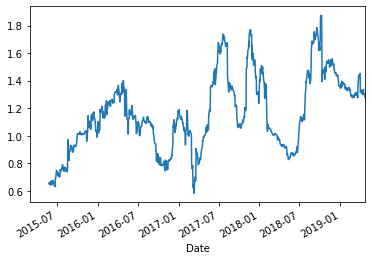

In [233]:
#Calculate the rolling 60 day beta of Berkshire
rolling_beta = rolling_covariance / rolling_variance 
rolling_beta.plot()

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [234]:
# (OPTIONAL) YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [235]:
#Calculate Sharpe Ratios
sharpe_ratios = (rtns_group.mean()*252)/(rtns_group.std()*np.sqrt(252))
sharpe_ratios.sort_values(inplace=True)
sharpe_ratios

PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
SOROS FUND MANAGEMENT LLC      0.356417
Algo 2                         0.501364
BERKSHIRE HATHAWAY INC         0.621810
S&P 500                        0.648267
Algo 1                         1.378648
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

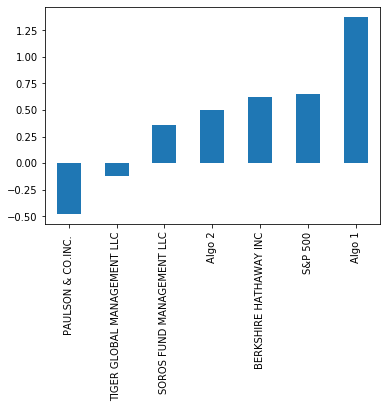

In [236]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar()

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [237]:
# Read the first stock
crm_csv = Path("Resources/crm_data.csv")
crm_reader = pd.read_csv(crm_csv, parse_dates = True, infer_datetime_format = True, index_col = 'Date')

In [238]:
#Outputting CRM_Reader 
crm_reader.head()

,Close
Date,
2015-03-02,68.46
2015-03-03,66.95
2015-03-04,64.88
2015-03-05,65.59
2015-03-06,64.56


In [239]:
# Rename Column
crm_clean = crm_reader.rename(columns = {'Close': 'CRM'})
crm_clean.head()

,CRM
Date,
2015-03-02,68.46
2015-03-03,66.95
2015-03-04,64.88
2015-03-05,65.59
2015-03-06,64.56


In [240]:
# Read the second stock
aapl_csv = Path("Resources/aapl_data.csv")
aapl_reader = pd.read_csv(aapl_csv, parse_dates = True, infer_datetime_format = True,index_col = 'Date')

In [241]:
#Output AAPL_Reader
aapl_reader.head()

,Close
Date,
2015-03-02,129.09
2015-03-03,129.36
2015-03-04,128.54
2015-03-05,126.41
2015-03-06,126.60


In [242]:
# Rename Column
aapl_clean = aapl_reader.rename(columns = {'Close': 'AAPL'})
aapl_clean.head()

,AAPL
Date,
2015-03-02,129.09
2015-03-03,129.36
2015-03-04,128.54
2015-03-05,126.41
2015-03-06,126.60


In [243]:
# Read the third stock
amzn_csv = Path("Resources/amzn_data.csv")
amzn_reader = pd.read_csv(amzn_csv, parse_dates = True, infer_datetime_format = True,index_col = 'Date')

In [244]:
#Output AMZN_Reader
amzn_reader.head()

,Close
Date,
2015-03-02,385.66
2015-03-03,384.61
2015-03-04,382.72
2015-03-05,387.83
2015-03-06,380.09


In [245]:
# Rename Column
amzn_clean = amzn_reader.rename(columns = {'Close': 'AMZN'})
amzn_clean.head()

,AMZN
Date,
2015-03-02,385.66
2015-03-03,384.61
2015-03-04,382.72
2015-03-05,387.83
2015-03-06,380.09


In [246]:
# Concatenate all stocks into a single DataFrame
stk_port = pd.concat([crm_clean, aapl_clean, amzn_clean],axis = 'columns', join = 'inner')
stk_port

,CRM,AAPL,AMZN
Date,,,
2015-03-02,68.46,129.09,385.66
2015-03-03,66.95,129.36,384.61
2015-03-04,64.88,128.54,382.72
2015-03-05,65.59,126.41,387.83
2015-03-06,64.56,126.60,380.09
...,...,...,...
2019-04-15,160.09,199.23,1844.87
2019-04-16,158.69,199.25,1863.04
2019-04-17,155.34,203.13,1864.82


In [247]:
# Drop Nulls
stk_port_clean = stk_port.dropna()
stk_port_clean

,CRM,AAPL,AMZN
Date,,,
2015-03-02,68.46,129.09,385.66
2015-03-03,66.95,129.36,384.61
2015-03-04,64.88,128.54,382.72
2015-03-05,65.59,126.41,387.83
2015-03-06,64.56,126.60,380.09
...,...,...,...
2019-04-15,160.09,199.23,1844.87
2019-04-16,158.69,199.25,1863.04
2019-04-17,155.34,203.13,1864.82


In [248]:
#Stock Percentage Changes 
stk_returns = stk_port_clean.pct_change()
stk_returns

,CRM,AAPL,AMZN
Date,,,
2015-03-02,NaN,NaN,NaN
2015-03-03,-0.022057,0.002092,-0.002723
2015-03-04,-0.030919,-0.006339,-0.004914
2015-03-05,0.010943,-0.016571,0.013352
2015-03-06,-0.015704,0.001503,-0.019957
...,...,...,...
2019-04-15,-0.003858,0.001810,0.000982
2019-04-16,-0.008745,0.000100,0.009849
2019-04-17,-0.021110,0.019473,0.000955


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [249]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
portfolio_returns = stk_returns.dot(weights)
portfolio_returns.head()

Date
2015-03-02         NaN
2015-03-03   -0.007563
2015-03-04   -0.014057
2015-03-05    0.002575
2015-03-06   -0.011386
dtype: float64

In [250]:
#Calculate the cumlative returns 
cumlative_port_returns = (1 + portfolio_returns).cumprod()
cumlative_port_returns.head()

Date
2015-03-02         NaN
2015-03-03    0.992437
2015-03-04    0.978487
2015-03-05    0.981006
2015-03-06    0.969836
dtype: float64

In [251]:
# Joining the new portfolio
entire_universe = pd.concat([rtns_group,portfolio_returns],axis = 'columns', join = 'inner')
entire_universe

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,0
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,-0.007563
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,-0.014057
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,0.002575
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.011386
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,0.004830
...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000629,-0.000355
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000401
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,-0.000227


In [252]:
entire_universe = entire_universe.rename(columns = {0: 'Portfolio'})
entire_universe.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Portfolio
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,-0.007563
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,-0.014057
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,0.002575
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.011386
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,0.004830


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [253]:
#Portfolio Risk
std_port = portfolio_returns.std()
std_port

0.014448366815750886

In [254]:
# Rolling 21 Day Standard Deviation 
rolling_std = portfolio_returns.rolling(window=21).std()
rolling_std

Date
2015-03-02         NaN
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
                ...   
2019-04-15    0.010629
2019-04-16    0.010478
2019-04-17    0.010456
2019-04-18    0.010324
2019-04-22    0.009330
Length: 1043, dtype: float64

In [255]:
# Calculating the Covariance 
rolling_portfolio_covariance = portfolio_returns.rolling(window=60).cov(rtns_group['S&P 500'])
rolling_portfolio_covariance

Date
2015-03-02         NaN
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
                ...   
2019-04-16    0.000068
2019-04-17    0.000060
2019-04-18    0.000060
2019-04-22    0.000060
2019-04-23         NaN
Length: 1044, dtype: float64

In [256]:
# Calculating the Variance 
rolling_portfolio_variance = rtns_group['S&P 500'].rolling(window=60).var()
rolling_portfolio_variance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    0.000041
2019-04-17    0.000037
2019-04-18    0.000037
2019-04-22    0.000037
2019-04-23    0.000037
Name: S&P 500, Length: 1043, dtype: float64

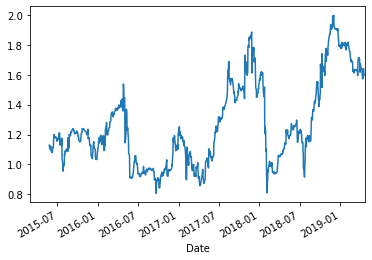

In [257]:
#Calculating the Rolling Beta of the Portfolio
rolling_portfolio_beta = rolling_portfolio_covariance / rolling_portfolio_variance 
rolling_portfolio_beta.plot()

In [258]:
# Annualzied Sharpe Ratios
portfolio_sharpe_ratio = (portfolio_returns.mean()*252)/(portfolio_returns.std()*np.sqrt(252))
portfolio_sharpe_ratio

1.1856888870885625

In [259]:
# Visualize the sharpe ratios as a bar plot
all_sharpe_ratios = (entire_universe.mean()*252)/(entire_universe.std()*np.sqrt(252))
all_sharpe_ratios.sort_values(inplace=True)
all_sharpe_ratios

PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
SOROS FUND MANAGEMENT LLC      0.342894
Algo 2                         0.484334
BERKSHIRE HATHAWAY INC         0.606743
S&P 500                        0.633139
Portfolio                      1.185689
Algo 1                         1.369589
dtype: float64

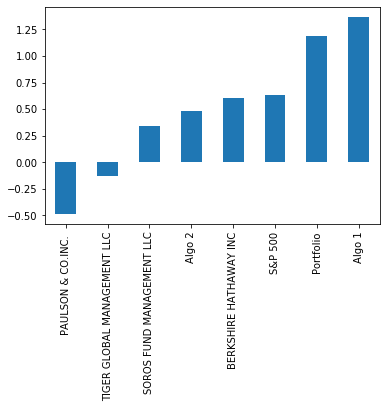

In [260]:
#Plotting Sharpes
all_sharpe_ratios.plot.bar()

## Include correlation analysis to determine which stocks (if any) are correlated

In [261]:
# Correlation of Portfolio
portfolio_correlation = stk_returns.corr()
portfolio_correlation

,CRM,AAPL,AMZN
CRM,1.000000,0.484991,0.541366
AAPL,0.484991,1.000000,0.515096
AMZN,0.541366,0.515096,1.000000


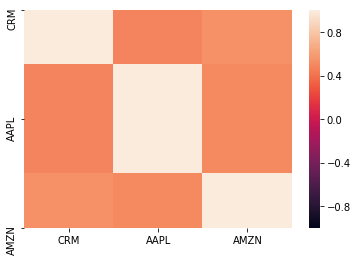

In [262]:
#Plotting in Seaborn
sns.heatmap(portfolio_correlation, vmin =-1, vmax=1)

In [263]:
#Entire Universe Correlation 
entire_uni_correlation = entire_universe.corr()
entire_uni_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Portfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.837731,0.673315
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.669636,0.505785
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,0.623776,0.458204
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,0.751137,0.734399
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,0.279130,0.261705
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,0.858620,0.640802
S&P 500,0.837731,0.669636,0.623776,0.751137,0.279130,0.858620,1.000000,0.777675
Portfolio,0.673315,0.505785,0.458204,0.734399,0.261705,0.640802,0.777675,1.000000


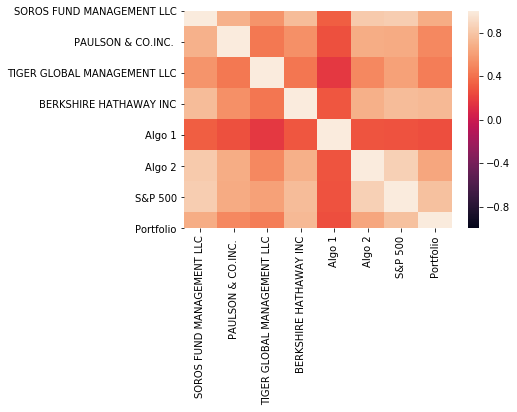

In [264]:
#Plotting in Seaborn
sns.heatmap(entire_uni_correlation, vmin=-1, vmax=1)